<a href="https://colab.research.google.com/github/RaccoonSec/Predicting-Link-Quality-on-Time-Series/blob/master/arima_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from glob import glob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!unzip /content/part-1601151.zip

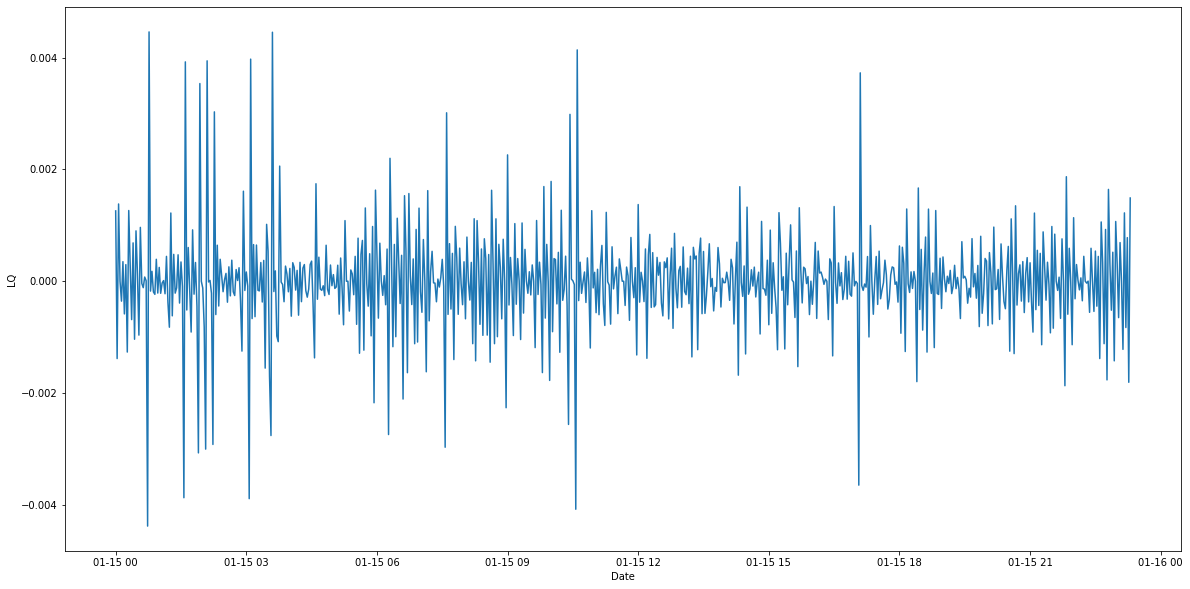

In [68]:
# reading files
files = glob("/content/part-160115/*.tsv")

#reading dataset
dataset = pd.concat([pd.read_csv(f, sep="\t", skiprows=1) for f in files], 
           ignore_index=True).rename(columns={'LQ': 'y'})

#dataset = (dataset['y'] - dataset['y'].mean()) / (dataset['y'].max() - dataset['y'].min())
dataset = dataset['y']
rolling_mean = dataset.rolling(window=15).mean()
dataset_without_mean = dataset - rolling_mean

dataset_norm = dataset_without_mean / (dataset_without_mean.max() - dataset_without_mean.min())
#dataset = dataset['y']
#new_data_norm.head()
#create dataframe
df = pd.DataFrame(dataset_norm)
dt_from = pd.to_datetime("2016-01-15 00:00:00.000000")
dt_to = pd.to_datetime("2016-01-15 23:59:59.999999")
df.insert(0, "date", pd.date_range(dt_from, dt_to, periods=len(df)))

df = df.set_index(["date"])
df = df.resample("2T").mean()
df = df[:700]

df.head()
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('LQ')
plt.plot(df)

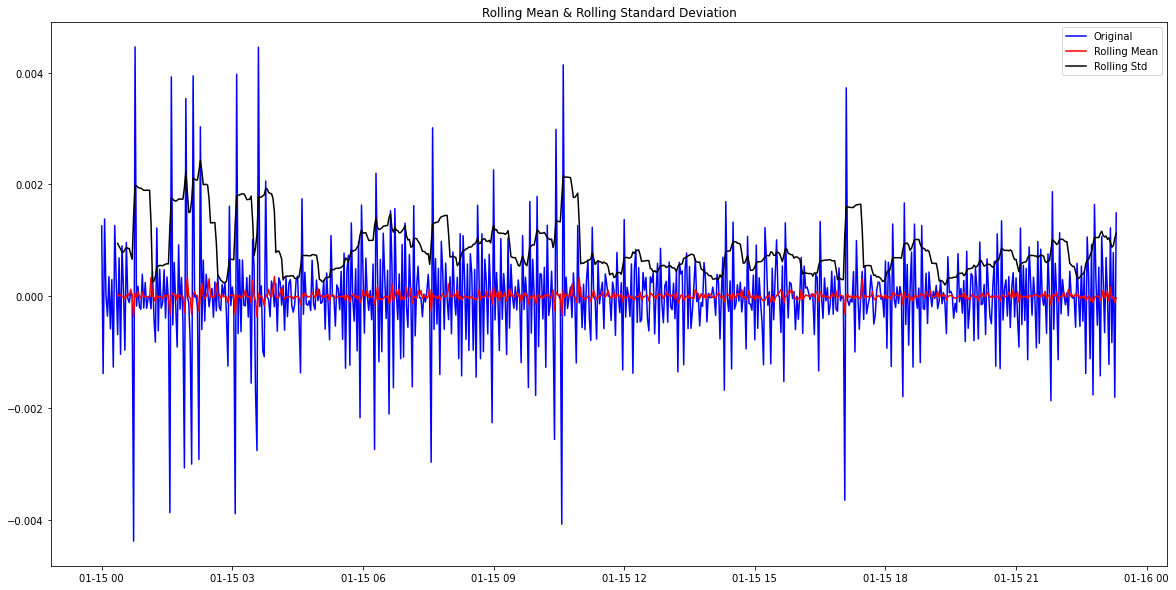

In [70]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

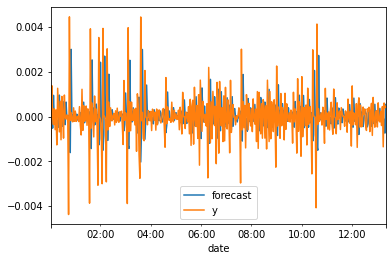

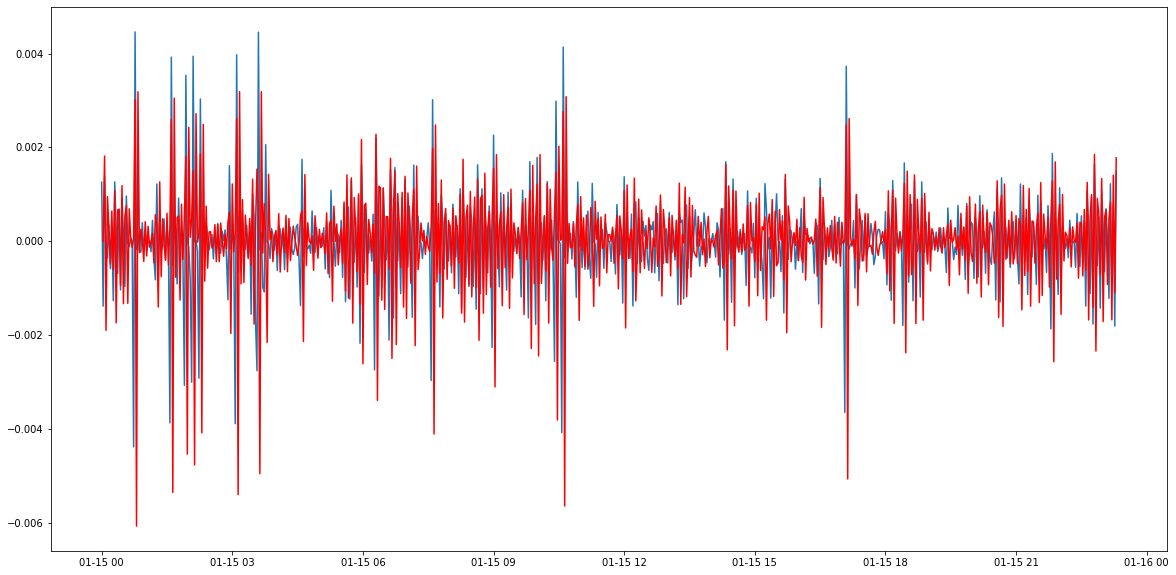

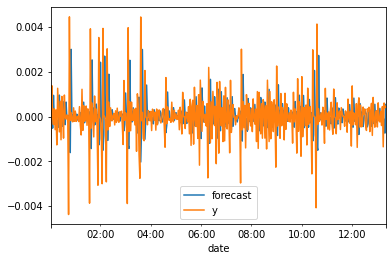

In [78]:
#decomposition = seasonal_decompose(df) 
model = ARIMA(df, order=(1,1,0))
results = model.fit(disp=-1)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(results.fittedvalues, color='red')
results.plot_predict(1,400)